# Analysis

This notebook is for extracting the bulk of the results for the project.

In [1]:
%matplotlib inline

/home/angelo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sinter
import stim
import stimbposd

import model
import util

In [3]:
# Edit matplotlib parameters
plt.rcParams.update(
    {
        "text.usetex": True,  # WARNING: make false if no TeX compiler installed
        "font.family": "Serif",
        "figure.dpi": 300,
    }
)

## $\text{Hamming}(7,4)$

In [4]:
clist_hamming_7_4 = ["B", "C", 0, 1, 5, 6, "B", "B", "C", 1, 2, 4, 5, "B", "B", "B", "C", 3, 4, 5, 6, "B"]
clist_rep_3 = ["B", "C", 0, 1, "B", "C", 1, 2, "B"]
pos_rep_3_rep_3 = [(x, 5 - y - 1) for y in range(5) for x in range(5)]
pos_hamming_7_4_hamming_7_4 = []
for y in range(10):
    for x in range(10):
        curr_coords = [x, 5 - y - 1]
        if x == 1:
            curr_coords[1] += 1
        elif x == 4:
            curr_coords[1] += 0.3
        elif x == 8:
            curr_coords[1] -= 0.5
        pos_hamming_7_4_hamming_7_4.append(tuple(curr_coords))

In [ ]:
plt.figure(figsize=(15, 10))
hp_code_hamming_7_4_hamming_7_4 = model.StabilizerModel(
    "hypergraph_product_code:x_memory",
    clist1=clist_hamming_7_4,
    clist2=clist_hamming_7_4,
    pos=pos_hamming_7_4_hamming_7_4,
    rounds=2,
)

hp_code_hamming_7_4_hamming_7_4.draw(with_labels=True)

In [ ]:
hp_code_tasks = [
    sinter.Task(
        circuit=model.StabilizerModel(
            "hypergraph_product_code:z_memory",
            clist1=clist_hamming_7_4,
            clist2=clist_hamming_7_4,
            pos=pos_hamming_7_4_hamming_7_4,
            rounds=5,
            noise_circuit=noise,
            noise_crossing=noise ** crossing_noise_exponent if crossing_noise_exponent > 0 else 0,
            noise_data=noise,
            noise_z_check=noise,
            noise_x_check=noise,
        ).circuit,
        json_metadata={
            "noise": noise,
            "crossing_noise": noise ** crossing_noise_exponent if crossing_noise_exponent > 0 else 0,
            "crossing_noise_exponent": crossing_noise_exponent,
        },
    )
    for noise in 10 ** np.linspace(-7, -1, 50)
    for crossing_noise_exponent in [
        -1,
        0.5,
        0.75,
        0.9,
        1,
    ]  # Cannot be negative otherwise p > 1. Negatives caught externally.
]

In [ ]:
collected_hp_code_stats = sinter.collect(
    num_workers=4,
    tasks=hp_code_tasks,
    decoders=["bposd"],
    custom_decoders=stimbposd.sinter_decoders(),
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

In [ ]:
fig = plt.figure(figsize=(12, 7))
sinter.plot_error_rate(
    ax=fig.gca(),
    stats=collected_hp_code_stats,
    x_func=lambda stat: stat.json_metadata["noise"],
    group_func=lambda stat: stat.json_metadata["crossing_noise_exponent"],
    plot_args_func=lambda index, curve: {
        "marker": ".",
        "lw": 0.6,
    },
)
plt.ylim(1e-5, 1.2)
plt.xlim(8e-8, 0.12)
plt.loglog()
plt.xlabel("Phyical Error Rate")
plt.ylabel("Logical Error Rate per Round")
plt.grid(which="major")
plt.grid(which="minor")
plt.legend(title="Crossing Noise\nProbability", );  # Give crossing number!

This does not show any dips, suggesting that dips are dependent on the position of the crossings.

In [13]:
hp_code_tasks_rep_hamming_spring_cross = [
    sinter.Task(
        circuit=model.StabilizerModel(
            "hypergraph_product_code:z_memory",
            clist1=util.pcm_to_clist(util.generate_rep_pcm(5)),
            clist2=util.pcm_to_clist(util.generate_hamming_pcm(n)),
            pos="spring",
            rounds=5,
            noise_circuit=noise,
            noise_crossing=noise ** 0.9,
            noise_data=noise,
            noise_z_check=noise,
            noise_x_check=noise,
        ).circuit,
        json_metadata={
            "noise": noise,
            "n": n,
        },
    )
    for noise in 10 ** np.linspace(-8, -1, 15)
    for n in [7, 15, 31]
]

[Z Logical Operators]
Using 4/4 logical operators:
[array([ 0, 10, 20, 30, 40]), array([ 1, 11, 21, 31, 41]), array([ 2, 12, 22, 32, 42]), array([ 3, 13, 23, 33, 43])] 

[Z Logical Operators]
Using 11/11 logical operators:
[array([ 0, 19, 38, 57, 76]), array([ 1, 20, 39, 58, 77]), array([ 2, 21, 40, 59, 78]), array([ 3, 22, 41, 60, 79]), array([ 4, 23, 42, 61, 80]), array([ 5, 24, 43, 62, 81]), array([ 6, 25, 44, 63, 82]), array([ 7, 26, 45, 64, 83]), array([ 8, 27, 46, 65, 84]), array([ 9, 28, 47, 66, 85]), array([11, 30, 49, 68, 87])] 

[Z Logical Operators]
Using 26/26 logical operators:
[array([  0,  36,  72, 108, 144]), array([  1,  37,  73, 109, 145]), array([  2,  38,  74, 110, 146]), array([  3,  39,  75, 111, 147]), array([  4,  40,  76, 112, 148]), array([  5,  41,  77, 113, 149]), array([  6,  42,  78, 114, 150]), array([  7,  43,  79, 115, 151]), array([  8,  44,  80, 116, 152]), array([  9,  45,  81, 117, 153]), array([ 10,  46,  82, 118, 154]), array([ 11,  47,  83, 119, 

In [14]:
collected_hp_code_stats_spring_cross = sinter.collect(
    num_workers=4,
    tasks=hp_code_tasks_rep_hamming_spring_cross,
    decoders=["bposd"],
    custom_decoders=stimbposd.sinter_decoders(),
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

Starting 4 workers...
45 cases left:
    bposd processes=4  ~core_mins_left=2       shots_left=987400   errors_left=5000    {n=7,noise=1e-08}
    bposd processes=0  ~core_mins_left=16      shots_left=999900   errors_left=5000    {n=15,noise=1e-08}
    bposd processes=0  ~core_mins_left=None    shots_left=1000000  errors_left=5000    {n=31,noise=1e-08}
    bposd processes=0  ~core_mins_left=6       shots_left=999900   errors_left=5000    {n=7,noise=3.162277660168379e-08}
45 cases left:
    bposd processes=4  ~core_mins_left=2       shots_left=971600   errors_left=4999    {n=7,noise=1e-08}
    bposd processes=0  ~core_mins_left=16      shots_left=999900   errors_left=5000    {n=15,noise=1e-08}
    bposd processes=0  ~core_mins_left=None    shots_left=1000000  errors_left=5000    {n=31,noise=1e-08}
    bposd processes=0  ~core_mins_left=6       shots_left=999900   errors_left=5000    {n=7,noise=3.162277660168379e-08}
45 cases left:
    bposd processes=4  ~core_mins_left=2       shots_left

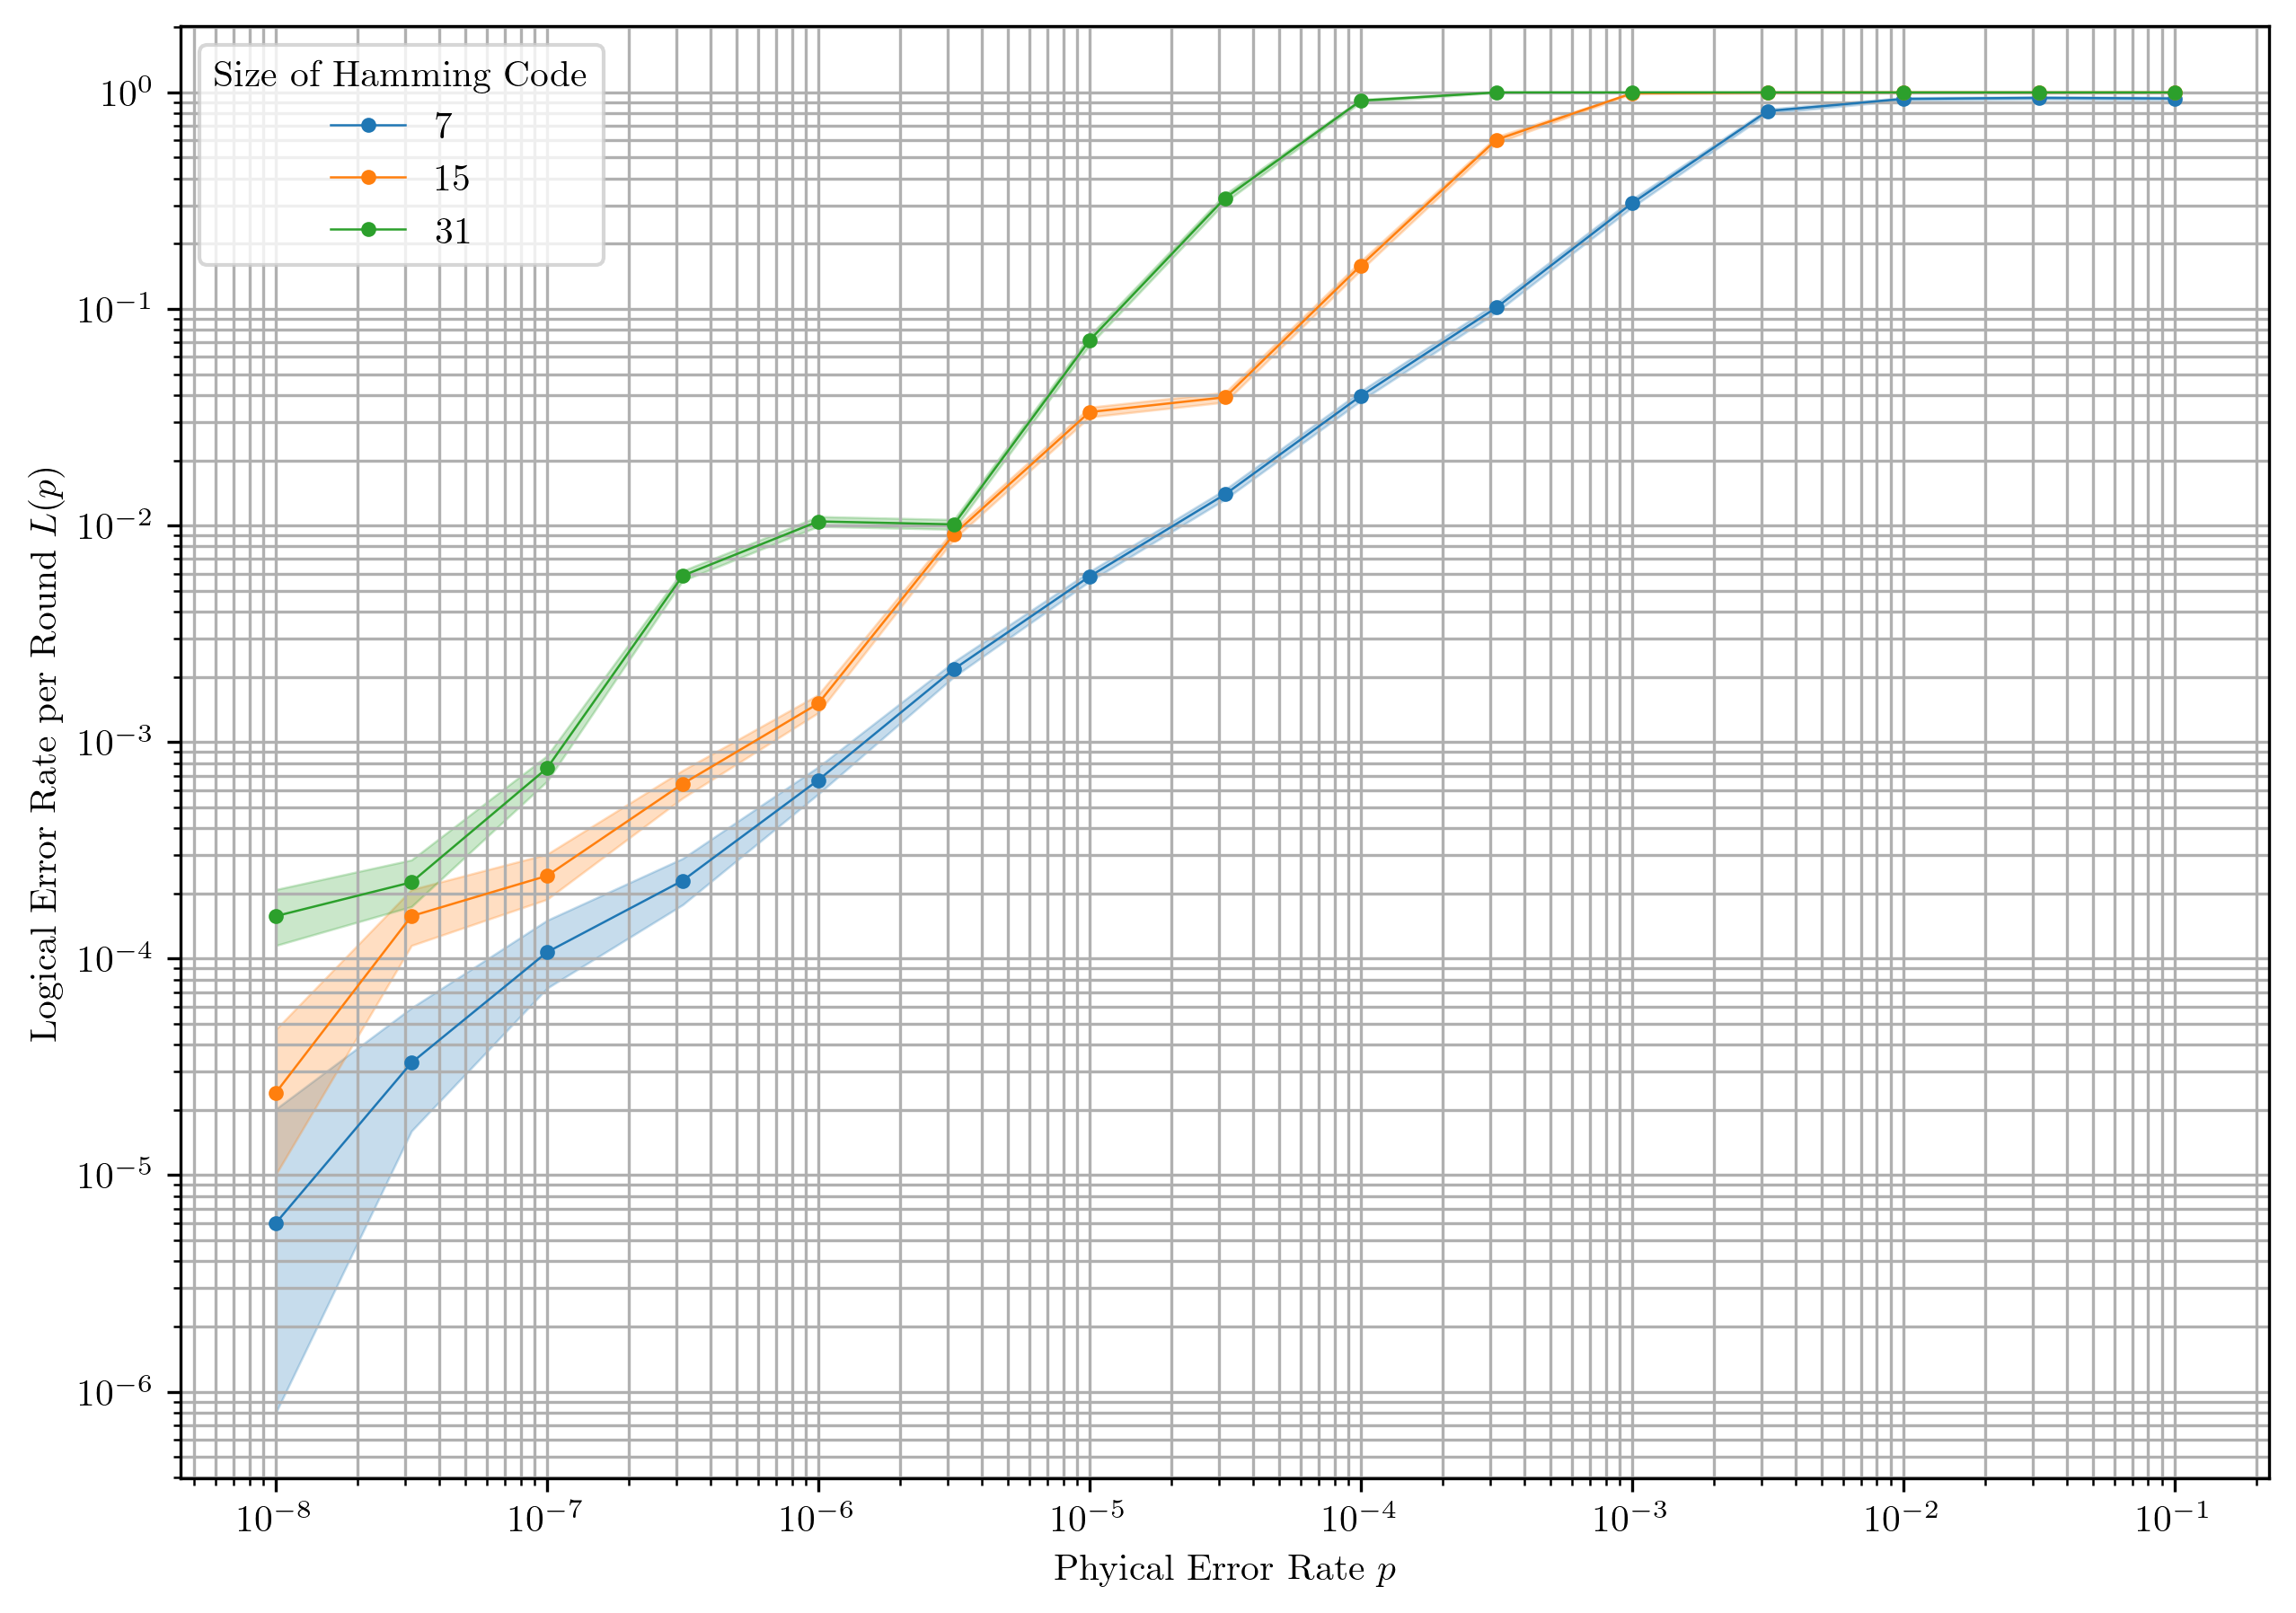

In [15]:
fig = plt.figure(figsize=(10, 7))
sinter.plot_error_rate(
    ax=fig.gca(),
    stats=collected_hp_code_stats_spring_cross,
    x_func=lambda stat: stat.json_metadata["noise"],
    group_func=lambda stat: stat.json_metadata["n"],
    plot_args_func=lambda index, curve: {
        "marker": ".",
        "lw": 0.6,
    },
)
# plt.ylim(1e-5, 1.2)
# plt.xlim(8e-8, 0.12)
plt.loglog()
plt.xlabel("Phyical Error Rate $p$")
plt.ylabel("Logical Error Rate per Round $L(p)$")
plt.grid(which="major")
plt.grid(which="minor")
plt.legend(title="Size of Hamming Code");  # Give crossing number!